getting a linear model by using least square method

In [184]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import inv

In [185]:
df = pd.read_csv('laptop_prices.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


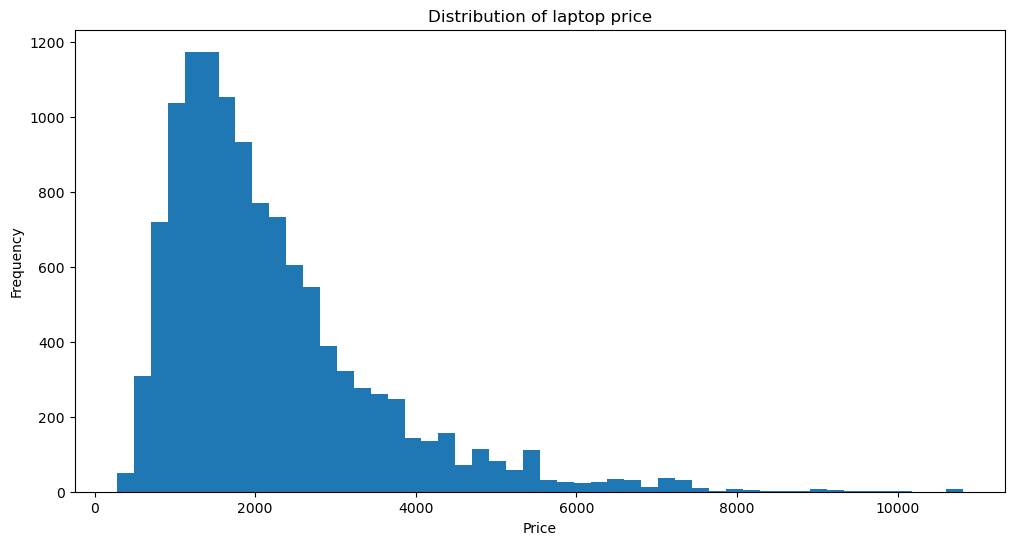

In [186]:
fig = plt.figure(figsize=(12,6))
plt.hist(df['Price ($)'],bins =50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of laptop price')
plt.show()

Preprocessing the Data

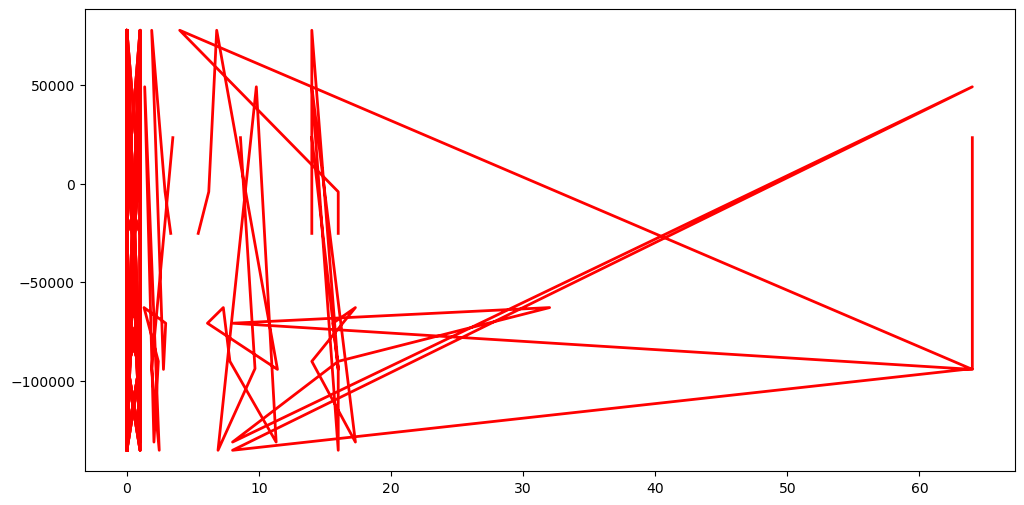

In [187]:
df = pd.get_dummies(df,columns=['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System'])
df.head()
df_no_target = df.drop(columns=['Price ($)'])
df_target = df['Price ($)']

X = np.array(df_no_target.values)
y = np.array(df_target.values)
X = X.astype(np.float64) 
y = y.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.001,random_state=100)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

least_square_parameter = inv(X_train_b.T @ X_train_b)@(X_train_b.T @ y_train)

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pre = X_test_b.dot(least_square_parameter)

mse = (1/(X_test.shape[0]*X_test.shape[1]))*(y_test-y_pre)**2

plt.figure(figsize=(12,6))
plt.plot(X_test,y_pre,label='Fitted line', color='red', linewidth=2)